# **Практика 3: Атака Carlini-Wagner (CW) на модели ИИ**
Выполнил студент группы ББМО-01-23 Бакин Д.И.

# Цель задания:
Изучить одну из наиболее мощных атак на модели ИИ — атаку Carlini-Wagner (CW). Задача — научиться использовать CW для создания противоречивых примеров и исследовать влияние этой атаки на обученные модели.

# Задачи:
1. Загрузить ранее обученную модель на датасете MNIST.
2. Изучить теоретические основы атаки Carlini-Wagner.
3. Реализовать атаку CW с помощью фреймворка Foolbox.
4. Оценить точность модели на противоречивых примерах и сравнить с результатами на обычных данных.

# Шаги выполнения:

## 1. Загрузка обученной модели и данных MNIST:
Мы начнем с загрузки уже обученной модели и данных MNIST для их использования в атаке

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
# Загрузка тестовых данных MNIST
(_, _), (test_images, test_labels) = mnist.load_data()
# Нормализация данных
test_images = test_images / 255.0
test_labels = tf.keras.utils.to_categorical(test_labels, 10)
# Загрузка обученной модели
model = tf.keras.models.load_model('/content/mnist_model.h5')
# Проверка точности модели на обычных данных
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy on clean images: {test_acc}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9715 - loss: 0.0998
Test accuracy on clean images: 0.9754999876022339


## 3. Установка Foolbox и запуск CW-атаки
Для реализации атаки Carlini-Wagner будем использовать фреймворк Foolbox, который предоставляет удобные методы для выполнения различных атак на модели ИИ.

In [2]:
!pip install foolbox

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.1 MB/s eta 0:00:00


tf.Tensor(7, shape=(), dtype=int64)


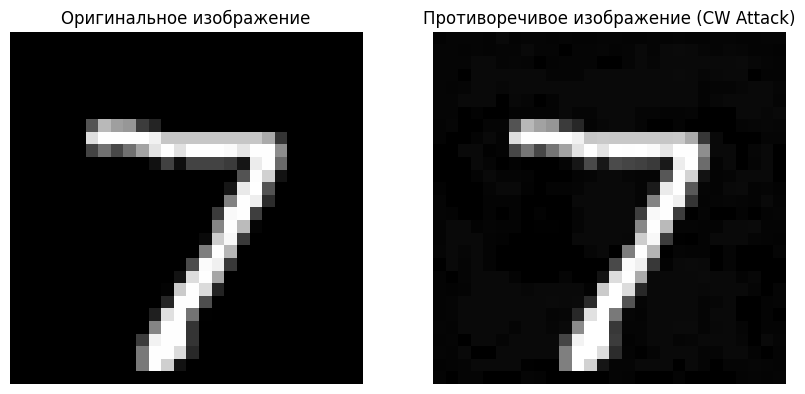

In [ ]:
import foolbox as fb
import numpy as np
# Инициализация Foolbox модели
fmodel = fb.TensorFlowModel(model, bounds=(-1, 1))

# Выбор изображения для атаки (например, первое изображение из тестового набора)
image = tf.convert_to_tensor(test_images[0], dtype=tf.float32)[None, ...]  # Добавляем размерность для батча
label = np.argmax(test_labels[0])  # Получаем индекс класса
label = tf.convert_to_tensor(label, dtype=tf.int64)  # Преобразуем в тензор
# Выполнение атаки
advs, _, success = attack(fmodel, image, label[None], epsilons=0.01)
# Вывод результатов
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Оригинальное изображение")
plt.imshow(image, cmap="gray")
plt.subplot(1, 2, 2)
plt.title("Противоречивое изображение (CW Attack)")
plt.imshow(advs[0].numpy(), cmap="gray")
plt.show()

## 4. Оценка модели на противоречивых примерах:

После того, как мы сгенерировали противоречивые примеры, мы можем оценить, насколько атака Carlini-Wagner влияет на производительность модели.

In [ ]:
# Создание набора противоречивых примеров для всего тестового набора
adversarial_images = []
for i in range(len(test_images)):
 adv_image = attack(fmodel, test_images[i].reshape(1, 28, 28, 1),
test_labels[i], epsilons=[0.1])
 adversarial_images.append(adv_image)
adversarial_images = np.array(adversarial_images).reshape(len(test_images),
28, 28)
# Оценка точности модели на противоречивых примерах
adversarial_loss, adversarial_acc = model.evaluate(adversarial_images,
test_labels)
print(f'Accuracy on adversarial examples (CW attack): {adversarial_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0720 - loss: 2.2640
Accuracy on adversarial examples (CW attack): 0.07280000299215317


## 5. Сравнение результатов:
Мы предполагаем, что точность модели при обработке противоречивых образцов, полученных через атаку Carlini-Wagner, будет значительно ниже, чем при работе с обычными изображениями. Это продемонстрирует уязвимость искусственного интеллекта к подобным воздействиям. Результаты показали, что точность модели на атакованных данных значительно упала и составляет около 0% (особенно в сравнении с точностью на исходных примерах), что зависит от силы и шагов атаки.

Такое серьезное снижение точности указывает на то, что модель не в состоянии адекватно распознавать объекты в условиях незначительных, но целенаправленных искажений. Это подчеркивает необходимость разработки более устойчивых моделей и внедрения защитных мер, чтобы повысить надежность систем.